In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
import matplotlib.pyplot as plt
import gc
%matplotlib inline

In [3]:
import tensorflow as tf
keras = tf.keras
import keras.layers as L
from keras.models import Model
#s = tf.InteractiveSession()

Using TensorFlow backend.


In [4]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2

# mypath='C:/Users/hp/Downloads/Image-Colorization-master/Image-Colorization-master/dataset/color1'
# onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
# images = numpy.empty(len(onlyfiles), dtype=object)
# for n in range(0, len(onlyfiles)):
#   images[n] = cv2.imread( join(mypath,onlyfiles[n]) )

In [5]:
import glob

In [7]:
img_dir = "./dataset/testing" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
x_train = [] 
for f1 in files: 
    img = cv2.imread(f1,0) 
    img=img[:144,:144] 
    img =img.flatten()
    for j in img:
        x_train.append(j)
 

In [43]:
img_dir = "./dataset/train" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
y_train = [] 

for f1 in files: 
    img = cv2.imread(f1,1) 
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=img[:144,:144,:]
    img =img.flatten()
    for j in img:
        y_train.append(j)
    

In [8]:
x_train=np.array(x_train)
x_train=x_train.reshape(208,144,144,1);

ValueError: cannot reshape array of size 62678160 into shape (208,144,144,1)

In [45]:
y_train=np.array(y_train)
y_train=y_train.reshape(208,144,144,3);
y_train.shape

(208, 144, 144, 3)

In [61]:
x_train=x_train/255.
#y_train=y_train/255.

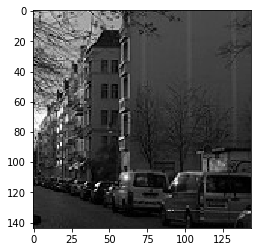

In [62]:
inh=x_train[0].reshape(144,144)
plt.imshow(inh,cmap='gray')

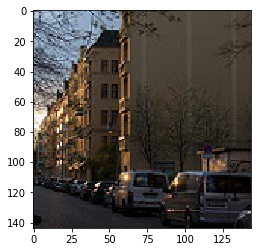

In [63]:

plt.imshow(y_train[0])

In [48]:
Model=tf.keras.Model
L=tf.keras.layers

In [49]:
def UNet():
    Xinpt = L.Input([None, None, 1])
    X0 = L.Conv2D(64, (3, 3), padding='same')(Xinpt)
    X0 = L.BatchNormalization()(X0)
    X0 = L.LeakyReLU(alpha=0.2)(X0)    #l,b,64
    X0 = L.Conv2D(64, (3, 3), strides=1, padding='same')(X0)
    X0 = L.BatchNormalization()(X0)
    X0 = L.LeakyReLU(alpha=0.2)(X0)    #l,b,64
    
    X1 = L.MaxPool2D((2, 2), strides=2)(X0)    #l/2,b/2,64
    X1 = L.Conv2D(128, (3, 3), padding='same')(X1)
    X1 = L.BatchNormalization()(X1)
    X1 = L.LeakyReLU(alpha=0.2)(X1)
    X1 = L.Conv2D(128, (3, 3), padding='same')(X1)
    X1 = L.BatchNormalization()(X1)
    X1 = L.LeakyReLU(alpha=0.2)(X1)    #l/2,b/2,128
    
    X2 = L.MaxPool2D((2, 2), strides=2)(X1)    #l/4,b/4,128
    X2 = L.Conv2D(256, (3, 3), padding='same')(X2)
    X2 = L.BatchNormalization()(X2)
    X2 = L.LeakyReLU(alpha=0.2)(X2)
    X2 = L.Conv2D(256, (3, 3), padding='same')(X2)
    X2 = L.BatchNormalization()(X2)
    X2 = L.LeakyReLU(alpha=0.2)(X2)    #l/4,b/4,256
    
    X3 = L.MaxPool2D((2, 2), strides=2)(X2)    #l/8,b/8,256
    X3 = L.Conv2D(512, (3, 3), padding='same')(X3)
    X3 = L.BatchNormalization()(X3)
    X3 = L.LeakyReLU(alpha=0.2)(X3)
    X3 = L.Conv2D(512, (3, 3), padding='same')(X3)
    X3 = L.BatchNormalization()(X3)
    X3 = L.LeakyReLU(alpha=0.2)(X3)    #l/8,b/8,512
    
    X4 = L.MaxPool2D((2, 2), strides=2)(X3)    #l/16,b/16,512
    X4 = L.Conv2D(1024, (3, 3), padding='same')(X4)
    X4 = L.BatchNormalization()(X4)
    X4 = L.LeakyReLU(alpha=0.2)(X4)
    X4 = L.Conv2D(1024, (3, 3), padding='same')(X4)
    X4 = L.BatchNormalization()(X4)
    X4 = L.LeakyReLU(alpha=0.2)(X4)    #l/16,b/16,1024
    
    X4 = tf.keras.layers.Conv2DTranspose(512, (2, 2), strides=2)(X4)    #l/8,b/8,512
    X4 = L.Concatenate()([X3, X4])     #l/8,b/8,1024
    X4 = L.Conv2D(512, (3, 3), padding='same')(X4)
    X4 = L.BatchNormalization()(X4)
    X4 = L.Activation('relu')(X4)
    X4 = L.Conv2D(512, (3, 3), padding='same')(X4)
    X4 = L.BatchNormalization()(X4)
    X4 = L.Activation('relu')(X4)    #l/8,b/8,512
    
    X3 = tf.keras.layers.Conv2DTranspose(256, (2, 2), strides=2)(X4)    #l/4,b.4,256
    X3 = L.Concatenate()([X2, X3])     #l/4,b/4,512
    X3 = L.Conv2D(256, (3, 3), padding='same')(X3)
    X3 = L.BatchNormalization()(X3)
    X3 = L.Activation('relu')(X3)
    X3 = L.Conv2D(256, (3, 3), padding='same')(X3)
    X3 = L.BatchNormalization()(X3)
    X3 = L.Activation('relu')(X3)    #l/4,b/4,256
    
    X2 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=2)(X3)    #l/2,b/2,128
    X2 = L.Concatenate()([X1, X2])     #l/2,b/2,256
    X2 = L.Conv2D(128, (3, 3), padding='same')(X2)
    X2 = L.BatchNormalization()(X2)
    X2 = L.Activation('relu')(X2)
    X2 = L.Conv2D(128, (3, 3), padding='same')(X2)
    X2 = L.BatchNormalization()(X2)
    X2 = L.Activation('relu')(X2)   #l/2,b/2,128
    
    X1 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=2)(X2)    #l,b,64
    X1 = L.Concatenate()([X0, X1])    #l,b,128
    X1 = L.Conv2D(64, (3, 3), padding='same')(X1)
    X1 = L.BatchNormalization()(X1)
    X1 = L.Activation('relu')(X1)
    X1 = L.Conv2D(64, (3, 3), padding='same')(X1)
    X1 = L.BatchNormalization()(X1)
    X1 = L.Activation('relu')(X1)    #l,b,64
    
    X0 = L.Conv2D(3, (1, 1), strides=1)(X1)     #l,b,3 
    model = Model(inputs=Xinpt, outputs=X0)
    return model
    
    

In [96]:
model = UNet()

In [97]:
model.compile('adam', loss='mean_squared_error', metrics=['mae', 'acc'])

In [52]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_69 (Conv2D)              (None, None, None, 6 640         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_66 (BatchNo (None, None, None, 6 256         conv2d_69[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_40 (LeakyReLU)      (None, None, None, 6 0           batch_normalization_66[0][0]     
_______________________________________________________________________________________

In [98]:
from IPython import display
for epoch in range(1, 10):
    #display.clear_output(wait=True)
    print('Epoch:', epoch)
    model.fit(x_train, y_train, batch_size=1)
    #sample_images(test, gray_test, 5)
    #model.save('unet_final_ver1.hdf5')

Epoch: 1
208/208 [==============================] - 293s 1s/step - loss: 0.0666 - mae: 0.1685 - acc: 0.3477
Epoch: 2
208/208 [==============================] - 292s 1s/step - loss: 0.0248 - mae: 0.1210 - acc: 0.3519
Epoch: 3
208/208 [==============================] - 274s 1s/step - loss: 0.0218 - mae: 0.1128 - acc: 0.3663
Epoch: 4
208/208 [==============================] - 278s 1s/step - loss: 0.0203 - mae: 0.1091 - acc: 0.3722
Epoch: 5
208/208 [==============================] - 235s 1s/step - loss: 0.0185 - mae: 0.1047 - acc: 0.3918
Epoch: 6
208/208 [==============================] - 220s 1s/step - loss: 0.0178 - mae: 0.1030 - acc: 0.3928
Epoch: 7
208/208 [==============================] - 229s 1s/step - loss: 0.0181 - mae: 0.1040 - acc: 0.4018
Epoch: 8
208/208 [==============================] - 222s 1s/step - loss: 0.0170 - mae: 0.1001 - acc: 0.3900
Epoch: 9
208/208 [==============================] - 219s 1s/step - loss: 0.0162 - mae: 0.0981 - acc: 0.4078


In [114]:
model.save('unet_final_ver1O1.hdf5')

In [6]:
model=tf.keras.models.load_model('unet_final_ver1O1.hdf5')

In [25]:
img_dir = "./dataset/Test" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
x_test = [] 
for f1 in files: 
    img = cv2.imread(f1,0) 
    img=img[:144,:144] 
    img =img.flatten()
    for j in img:
        x_test.append(j)
 

In [27]:
x_test=np.array(x_test)
x_test=x_test.reshape(17,144,144,1);

In [28]:
x_test=x_test/255.

In [29]:
pred=model.predict(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


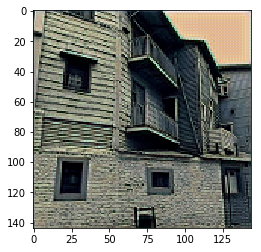

In [48]:
plt.imshow(pred[1])

In [69]:
pred.shape

(208, 144, 144, 3)

In [92]:
mx=np.amax(pred[10])
mn=np.amin(pred[10])
img=pred[0]
img=img-mn
img=img/(mx-mn);
